# **Imports**


In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [57]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D , SpatialDropout2D , MaxPooling2D ,Flatten ,BatchNormalization , GlobalAveragePooling2D,Dropout
from keras.models import  Sequential
import matplotlib.pyplot as plt
from keras import backend as  k
from keras import optimizers
import pandas as pd



# **Data-Set**


In [4]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(X_train,Y_train),(X_test,Y_test) =  mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
class_names= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
training_portion = .8

In [9]:
train_size = int(len(X_train) * training_portion)
x_train = X_train[:train_size]
y_train = Y_train[:train_size]

x_val =  X_train[train_size:]
y_val = Y_train[train_size:]

validation_size = int(len(X_train) - train_size)

In [10]:
y_val

array([5, 7, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
Y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [12]:
x_val[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   5,   0,  43,  42,   0,   2,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   3,   7,   0,   0, 149, 206,   5,   0,
          3,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,
          1,   0,   4,   2,   8,   0,   0,   0,  10, 148, 222, 179,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   2,   0,   3,
         11,   5,   0,   0,   0,  32, 136, 189, 220, 224, 207, 216, 155,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   3,   9,   0,
          0,   0,   7, 105, 177, 212, 226, 221, 215, 211, 212, 190, 214,
         65,   0],
       [  

In [13]:
x_train.shape , y_train.shape , x_val.shape , y_val.shape

((48000, 28, 28), (48000,), (12000, 28, 28), (12000,))

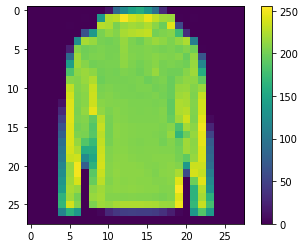

In [14]:

plt.figure()
plt.imshow(x_val[100])
plt.colorbar()
plt.grid(False)
plt.show()

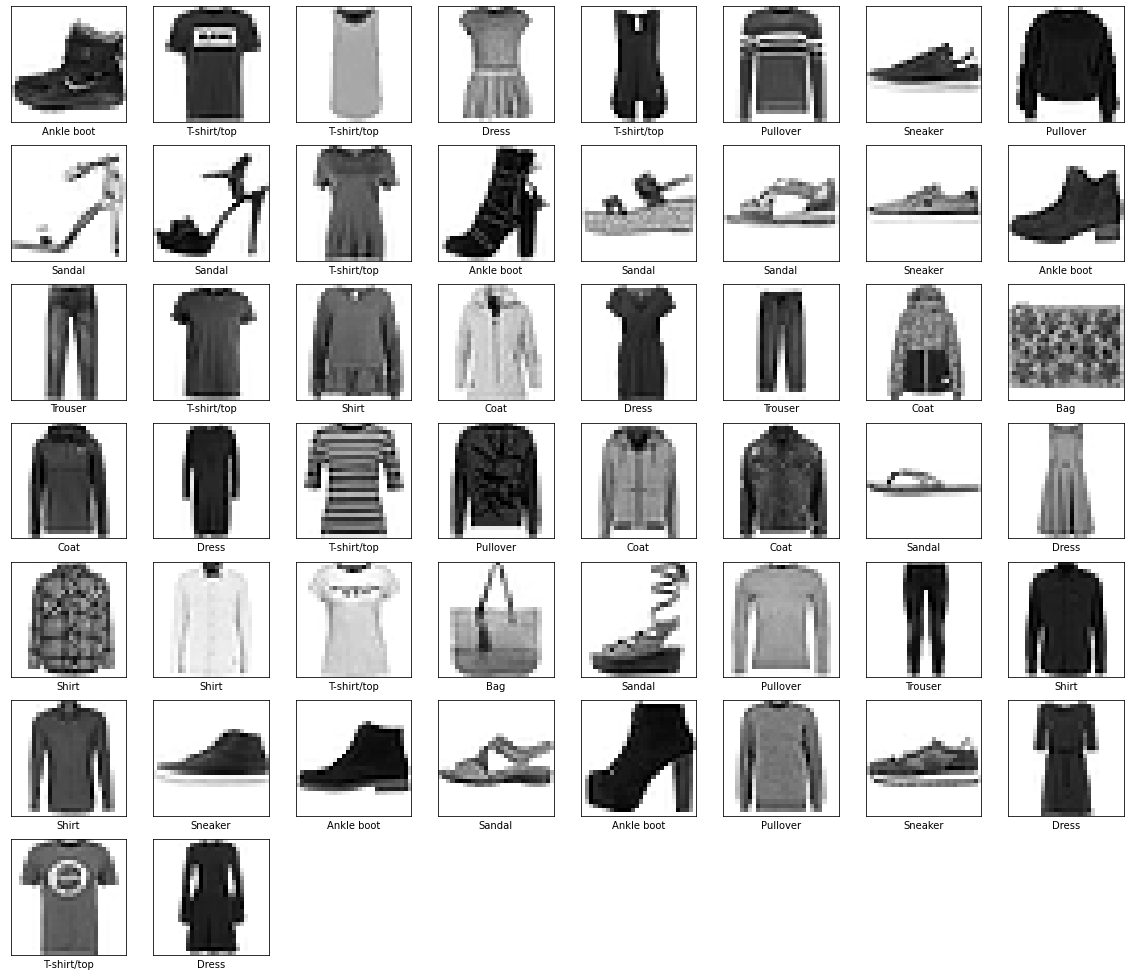

In [15]:
plt.figure(figsize=(20,20))
# to print first 50 images 
for i in range(0,50):
  plt.subplot(8,8,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [26]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
#Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [16]:
if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0],28,28,1)
  x_val = X_val.reshape(x_val.shape[0],28,28,1)
  X_test = X_test.reshape(X_test.shape[0],28,28,1)
  input_shape = (28,28,1)
else :
  x_train = x_train.reshape(x_train.shape[0],28,28,1)
  x_val = x_val.reshape(x_val.shape[0],28,28,1)
  X_test = X_test.reshape(X_test.shape[0],28,28,1)
  input_shape = (28,28,1)
  
x_train = x_train/255.0
x_val = x_val/255.0




In [17]:
X_train.shape

(60000, 28, 28)

In [27]:
x_train = np.reshape(x_train, ((-1, 28, 28, 1)))

#and also covert the train input lable is 2 dimention :

y_train = np.reshape(y_train, ((-1,10 )))

In [28]:
x_val= np.reshape(x_val, ((-1, 28, 28, 1)))

#and also covert the train input lable is 2 dimention :

y_val = np.reshape(y_val, ((-1,10 )))



# **Model**


In [29]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape = input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.5))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.5))
model.add(BatchNormalization())

model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

adam = optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer= adam ,loss = 'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
spatial_dropout2d_4 (Spatial (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 128)        

In [30]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint('Fashion_Classification_model.hdf5', monitor='val_loss', verbose=1, save_best_only=True)
earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)

In [39]:
history = model.fit(x_train,
                    y_train,
                    batch_size= 16,
                    callbacks=[checkpointer,earlystop],
                    epochs =50, 
                    verbose = 1,
                    shuffle=True,
                    validation_data=(x_val,y_val))

Epoch 1/50
3000/3000 [==============================] - ETA: 0s - loss: 0.1837 - accuracy: 0.9330
Epoch 00001: val_loss did not improve from 0.19029
3000/3000 [==============================] - 12s 4ms/step - loss: 0.1837 - accuracy: 0.9330 - val_loss: 0.1921 - val_accuracy: 0.9309
Epoch 2/50
2991/3000 [============================>.] - ETA: 0s - loss: 0.1820 - accuracy: 0.9339
Epoch 00002: val_loss did not improve from 0.19029
3000/3000 [==============================] - 12s 4ms/step - loss: 0.1821 - accuracy: 0.9338 - val_loss: 0.1971 - val_accuracy: 0.9273
Epoch 3/50
2994/3000 [============================>.] - ETA: 0s - loss: 0.1775 - accuracy: 0.9345
Epoch 00003: val_loss did not improve from 0.19029
3000/3000 [==============================] - 11s 4ms/step - loss: 0.1775 - accuracy: 0.9345 - val_loss: 0.1930 - val_accuracy: 0.9288
Epoch 4/50
2986/3000 [============================>.] - ETA: 0s - loss: 0.1748 - accuracy: 0.9360
Epoch 00004: val_loss improved from 0.19029 to 0.1886

# **Evaluting the model**


In [40]:
test_loss,test_accuracy = model.evaluate(x_val,y_val,verbose= 1)
print('\n Test Accuracy',test_accuracy)

375/375 [==============================] - 1s 3ms/step - loss: 0.1840 - accuracy: 0.9333

 Test Accuracy 0.9332500100135803


# **Make prediction and Submission on Kaggle**


In [49]:
pre = []
for i in range(len(X_test)):
    prediction = model.predict(X_test)
    predicted_label = np.argmax(prediction[i])
    print(predicted_label )
    pre.append(predicted_label)

Streaming output truncated to the last 5000 lines.
2
3
6
4
4
3
6
9
4
7
0
8
8
5
6
2
0
1
3
9
4
2
5
0
5
3
2
5
0
0
8
0
6
9
1
3
3
2
5
0
4
0
1
4
9
7
4
4
7
5
7
1
8
8
5
9
5
7
0
2
9
2
5
0
7
8
2
5
2
7
3
3
2
5
9
2
5
0
7
3
8
3
5
6
5
3
2
7
6
9
5
1
3
6
9
1
6
4
5
3
4
7
9
1
2
2
2
4
6
8
7
9
9
3
8
8
9
0
5
6
4
8
8
6
4
4
0
1
4
0
2
1
5
4
6
6
0
3
4
5
6
8
5
6
6
3
1
8
8
8
9
9
5
5
8
2
5
4
4
2
5
4
9
2
9
1
6
6
6
6
9
8
3
4
9
1
9
4
5
3
5
4
3
4
2
1
6
2
2
3
7
8
4
5
5
9
0
4
3
4
5
5
5
7
6
1
3
3
7
0
8
7
6
8
3
5
5
8
1
9
4
0
4
2
1
6
0
1
6
5
2
8
1
1
7
0
2
5
9
0
8
0
8
4
2
7
0
7
3
3
2
1
7
1
6
2
3
3
0
6
6
4
8
7
0
3
8
4
7
3
2
6
0
2
4
4
1
8
1
9
1
2
6
4
6
5
3
3
5
3
5
8
3
9
7
3
0
2
1
0
1
0
7
7
8
8
9
0
1
5
4
9
4
5
9
9
9
0
1
0
9
9
5
1
7
2
9
1
5
6
8
1
5
3
3
8
2
7
8
8
9
8
8
4
5
6
4
5
9
0
0
5
3
5
7
4
4
7
4
5
8
3
7
2
7
3
8
8
8
7
8
6
0
5
7
9
8
5
4
0
6
2
4
2
8
9
9
1
9
5
8
4
4
8
4
8
7
4
8
3
0
7
8
8
3
9
9
5
9
2
6
9
7
5
7
2
9
9
2
3
9
5
3
5
4
1
2
9
1
2
8
5
1
7
9
6
3
1
6
9
0
4
6
0
0
2
9
5
1
9
8
5
6
8
5
9
5
2
4
0
5
2
2
5
4
2
7
1
6
6
8
2
5
6
4

In [51]:
pre

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 4,
 1,
 2,
 6,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 4,
 8,
 8,
 8,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 6,
 1,
 2,
 7,
 6,
 7,
 2,
 1,
 2,
 6,
 4,
 6,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 8,
 3,
 9,
 8,
 7,
 0,
 2,
 8,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 2,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 2,
 2,
 3,
 6,
 7,
 2,
 7,
 8,
 5,
 8,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 0,
 8,
 2,
 0,
 8,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 6,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 2,
 2,
 2,
 6,
 4,
 1,
 4,
 5,
 2,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 6,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 6,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 2,
 5,
 1,
 4,
 2,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 4,
 2,
 2,


In [52]:
len(pre)

10000

In [53]:
Id = []

In [54]:
for i in range(0,10000):
  Id.append(i)

In [55]:
len(Id)

10000

In [58]:
submission = pd.DataFrame({
        "Id": Id,
        "Category": pre
    })

In [59]:
submission.to_csv('submission.csv', index=False)

# **Make Preduction For one Image/Sample**

In [41]:
import numpy as np
for i in range(len(X_test))
predict =  model.predict(X_test)
np.argmax(predict[0])

9

In [42]:
Y_test[0]

9

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model



In [ ]:
def load_img (filename):
  img = load_img(filename, grayscale = True, target_size(28,28))
  img = img_to_array(img)
  img = img.astype('float32')
  return img
# load image and predict 
def run_example():
  img = load_img('/content/sample_image.png')
  model = load_model('/content/Fashion_Classification_model.hdf5')
  result = model.predict_classes(img)
  print(result[0])
run_example()


SyntaxError: ignored